# OpenCV. РОБОТА із ЗОБРАЖЕННЯМИ
## Файл: CV_Image_04_001

### Просторова фільтрація зображень. Лінійна фільтрація

#### SEE [Imgproc module](https://docs.opencv.org/2.4/doc/tutorials/imgproc/table_of_content_imgproc/table_of_content_imgproc.html)
#### SEE [Image Filtering](https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html)

In [1]:
## Завантаження пакетів
import numpy as np
import matplotlib.pyplot as plt # this lets you draw inline pictures in the notebooks
import skimage.io as io
plt.rcParams['font.size'] = 10

In [2]:
import cv2 as cv
print (cv.__version__)

4.10.0


#### Читання зображення з файлу

In [3]:
## Завантаження файлу зображення
path = './IMAGES/'
filename = 'Lenna.png' 
test_im_lena = cv.imread(path + filename)
# test_im_lena = np.uint32(test_im_lena) 
## Визначення стркутури та розміру зображення
rows_num = test_im_lena.shape[0] ## кількість рядків
clms_num = test_im_lena.shape[1] ## кількість колонок
pix_num = rows_num*clms_num ## кількість пікселів
bins = 256 ## кількість рівнів яскравості

print('IMAGE SHAPE', test_im_lena.shape)
print('DATA Type',test_im_lena.dtype)
print('IMAGE SIZE',test_im_lena.size)

## Додаємо СІЛЬ
test_im_lena [50,50,:] = [255,255,255] 
test_im_lena [51,50,:] = [255,255,255] 
test_im_lena [50,51,:] = [255,255,255] 
test_im_lena [51,51,:] = [255,255,255] 

IMAGE SHAPE (512, 512, 3)
DATA Type uint8
IMAGE SIZE 786432


#### Display the image in a window !!! with CV

In [4]:
# Wait for a key press and close the window
while True:
    cv.imshow('Display window', test_im_lena)
    if cv.waitKey(1) == ord('q'):
        break
cv.destroyAllWindows()


#### Display the image in a window with MATPLOTLIB

DATA Type uint8


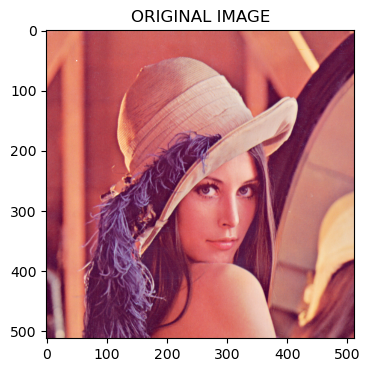

In [6]:
# Convert the image from BGR to RGB
rgb_test_im = cv.cvtColor(test_im_lena, cv.COLOR_BGR2RGB)
print('DATA Type',rgb_test_im.dtype)
fig, ax = plt.subplots(figsize=(4, 4))
plt.title('ORIGINAL IMAGE')
plt.imshow(rgb_test_im)
plt.show()

#### Усередняючий фільтр Box filter

Фільтр обчислює середнє значення інтенсивності пікселів у вікні заданого розміру і надає це середнє значення центральному пікселю вікна.

cv.boxFilter(src, ddepth, ksize[, dst[, anchor[, normalize[, borderType]]]]) → dst

**Parameters**:	

- src – вхідне зображення.
- dst – результат - зображення тогож розміру та типу, що і .
- ddepth – глибина вихідного зображеннґ (-1 для використання src.depth()).
- ksize – розмір ядра.
- anchor – якірна точка; за замовчуванням Point(-1,-1) - якір це центр ядра.
- normalize – flag (прапор), який вказує, чи потрібно нормалізувати результат фільтрації.
- borderType – режим кордону, який використовується для екстраполяції пікселів за межами зображення.
  

Функція згладжує зображення за допомогою ядра:

$$\texttt{K} =  \alpha \begin{bmatrix} 1 & 1 & 1 &  \cdots & 1 & 1  \\ 1 & 1 & 1 &  \cdots & 1 & 1  \\ ...... \\ 1 & 1 & 1 &  \cdots & 1 & 1 \end{bmatrix}$$


In [7]:
kernel_size = (5, 5)  # Розмір ядра
box_blurred_img = cv.boxFilter(test_im_lena, -1, kernel_size)
print('IMAGE SHAPE', box_blurred_img.shape)
print('DATA Type',box_blurred_img.dtype)
print('IMAGE SIZE',box_blurred_img.size)


IMAGE SHAPE (512, 512, 3)
DATA Type uint8
IMAGE SIZE 786432


In [8]:
# Wait for a key press and close the window
while True:
    cv.imshow('Display window', box_blurred_img)
    if cv.waitKey(1) == ord('q'):
        break
cv.destroyAllWindows()


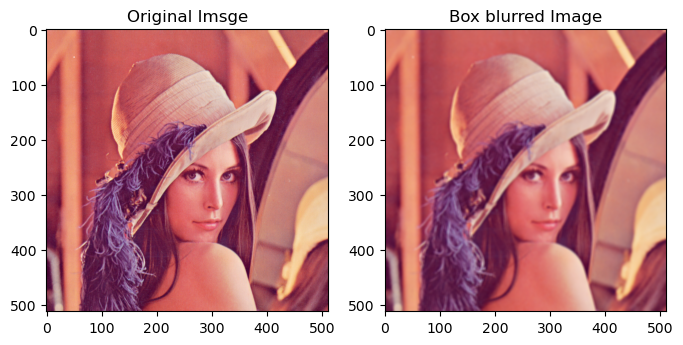

In [25]:
rgb_box_blurred_img = cv.cvtColor(box_blurred_img, cv.COLOR_BGR2RGB)
# Відображуємо за допомогою MATPLOTLIB
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()
ax[0].set_title("Original Imsge")
ax[0].imshow(rgb_test_im)
ax[1].set_title("Box blurred Image")
ax[1].imshow(rgb_box_blurred_img)
plt.show()

#### Фільтр Гауса

Фільтр забезпечує більш плавне розмиття порівняно з бокс-фільтром, оскільки використовує розподіл Гауса для обчислення ваги пікселів.

cv.GaussianBlur(src, ksize, sigmaX, sigmaY=0, borderType=cv2.BORDER_DEFAULT)

- src: вхідне зображення.
- ksize: розмір ядра фільтру. Непарний кортеж  (наприклад, (5,5)).
- sigmaX:  Стандартне відхилення вздовж осі X. 
- sigmaY: Стандартне відхилення вздовж осі Y. Якщо = 0,  буде sigmaX. 
- borderType:  тип кордону, який використовується для екстраполяції пікселів за межами зображення.

In [10]:
gauss_blurred_img = cv.GaussianBlur(test_im_lena, (5, 5), 0)

In [11]:
while True:
    cv.imshow('Display window', gauss_blurred_img)
    if cv.waitKey(1) == ord('q'):
        break
cv.destroyAllWindows()


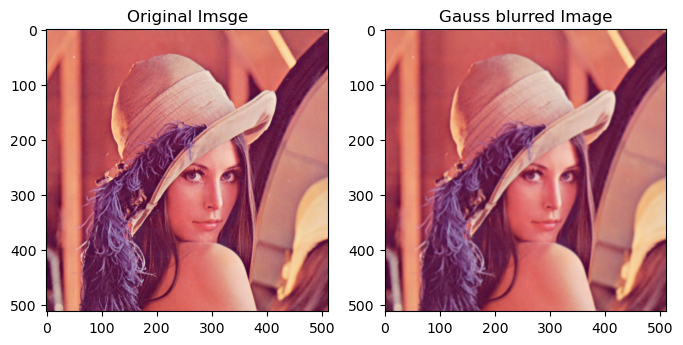

In [26]:
rgb_gauss_blurred_img = cv.cvtColor(gauss_blurred_img, cv.COLOR_BGR2RGB)
# Відображуємо за допомогою MATPLOTLIB
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()
ax[0].set_title("Original Imsge")
ax[0].imshow(rgb_test_im)
ax[1].set_title("Gauss blurred Image")
ax[1].imshow(rgb_gauss_blurred_img)
plt.show()

#### Фільтр Лапласа

Фільтр використовується для виявлення кордонів зображення.
Він обчислює друуе похідуе зображення, що дозволяє знайти різкі зміни інтенсивності пікселів, які відповідають краям об'єктів.

cv.Laplacian(src, ddepth[, dst[, ksize[, scale[, delta[, borderType]]]]]) → dst

Параметри:	
- src – Source image.
- dst – Destination image of the same size and the same number of channels as src.
- ddepth – Desired depth of the destination image.
- ksize – Aperture size used to compute the second-derivative filters. See getDerivKernels() for details. The size must be positive and odd.
- scale – Optional scale factor for the computed Laplacian values. By default, no scaling is applied. See getDerivKernels() for details.
- delta – Optional delta value that is added to the results prior to storing them in dst .
- borderType – Pixel extrapolation method. See borderInterpolate() for details.

Функція обчислює перетвоення Лапласа над вхідним зображенням, додавая другі похідні по X та Y, обчислені за допомогою опертора Собеля:

$$\texttt{dst} =  \Delta \texttt{src} =  \frac{\partial^2 \texttt{src}}{\partial x^2} +  \frac{\partial^2 \texttt{src}}{\partial y^2}$$

This is done when ksize > 1 . When ksize == 1 , the Laplacian is computed by filtering the image with the following $3 \times 3$ aperture:

$$\texttt{Kernal} =  \begin{bmatrix} 0 & 1 & 0 \\ 1 & -4 & 1  \\ 0 & 1 & 0  \end{bmatrix}$$



In [14]:
# Завантаження зображення
# !Завантажуємо у відтінках сірого
img = cv.imread('image.jpg', 0)  

path = './IMAGES/'
filename = 'Lenna.png' 
test_im_lena = cv.imread(path + filename, 0)

In [15]:
# Використвуємо фільтр Лапласа
laplacian_im = cv.Laplacian(test_im_lena, cv.CV_64F)
laplacian = np.uint8(np.absolute(laplacian_im))


In [21]:
# Відображуємо за допомогою CV
# Wait for a key press and close the window
while True:
    cv.imshow('Original IMAGE', test_im_lena)
    if cv.waitKey(1) == ord('q'):
        break
while True:
    cv.imshow('Laplacian IMAGE', laplacian)
    if cv.waitKey(1) == ord('q'):
        break
cv.destroyAllWindows()

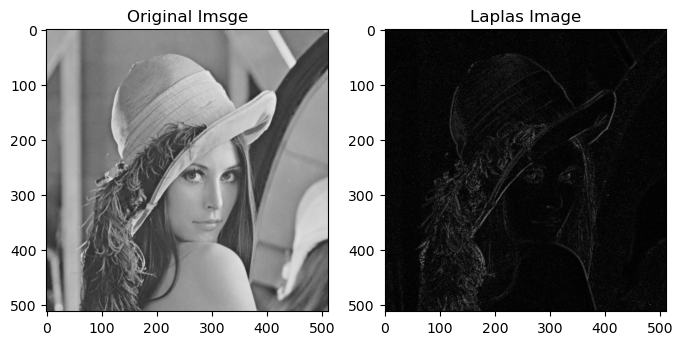

In [19]:
# Відображуємо за допомогою MATPLOTLIB
rgb_test_im_lena = cv.cvtColor(test_im_lena, cv.COLOR_BGR2RGB)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()
ax[0].set_title("Original Imsge")
ax[0].imshow(rgb_test_im_lena)
ax[1].set_title("Laplas Image")
ax[1].imshow(rgb_laplas)

plt.show()